In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL.Image
import pandas as pd

# CNN

In [2]:
#df_CNN=pd.read_csv('CNN\\1confirmed-MNIST(nu=0.0005-then-0.00001, kernel = poly, gamma =auto,nu_out=100)with scores_asceding=True.csv')
df_CNN=pd.read_csv('E:\\1Thesis\\write thesis\\Good Results\\New23-10-2022\\Fashoin\\CNN\\FashionMNIST-last.csv')
df_CNN

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of outliers,Time
0,0,tensor(1.),tensor(0.7388),0.7333,200.0,0.000000
1,1,tensor(1.),tensor(0.8101),0.7333,300.0,532.785811
2,2,tensor(1.),tensor(0.8189),0.8127,250.0,518.851439
3,3,tensor(1.),tensor(0.8211),0.8180,250.0,535.541902
4,4,tensor(1.),tensor(0.8224),0.8208,250.0,557.769602
5,5,tensor(1.),tensor(0.8263),0.8205,250.0,577.722359
6,6,tensor(1.),tensor(0.8301),0.8235,250.0,609.241468
7,7,tensor(1.),tensor(0.8334),0.8279,250.0,619.838227
8,8,tensor(1.),tensor(0.8333),0.8328,250.0,629.266325
9,9,tensor(1.),tensor(0.8438),0.8359,250.0,654.478041


In [3]:
nu_samples=df_CNN['Length of outliers'].values

In [4]:
Ratios=[]
for i in range(len(df_CNN)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_CNN['Ratios']=Ratios
#Ratios
df_CNN

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of outliers,Time,Ratios
0,0,tensor(1.),tensor(0.7388),0.7333,200.0,0.000000,0.33
1,1,tensor(1.),tensor(0.8101),0.7333,300.0,532.785811,0.83
2,2,tensor(1.),tensor(0.8189),0.8127,250.0,518.851439,1.25
3,3,tensor(1.),tensor(0.8211),0.8180,250.0,535.541902,1.67
4,4,tensor(1.),tensor(0.8224),0.8208,250.0,557.769602,2.08
5,5,tensor(1.),tensor(0.8263),0.8205,250.0,577.722359,2.50
6,6,tensor(1.),tensor(0.8301),0.8235,250.0,609.241468,2.92
7,7,tensor(1.),tensor(0.8334),0.8279,250.0,619.838227,3.33
8,8,tensor(1.),tensor(0.8333),0.8328,250.0,629.266325,3.75
9,9,tensor(1.),tensor(0.8438),0.8359,250.0,654.478041,4.17


# ResNet

In [6]:
df_Res=pd.read_csv('E:\\1Thesis\\write thesis\\Good Results\\New23-10-2022\\Fashoin\\ResNet\\ResNet-ALL FashionMNIST.csv')
df_Res

,Unnamed: 0,Test ACC,Length of outliers,Time
0,0,0.7130,200.0,0.000998
1,1,0.7130,300.0,775.539608
2,2,0.7171,250.0,754.603908
3,3,0.7694,250.0,765.731281
4,4,0.7216,250.0,793.368061
5,5,0.7481,250.0,813.576873
6,6,0.8003,250.0,833.478571
7,7,0.8001,250.0,855.633793
8,8,0.7901,250.0,880.675556
9,9,0.7911,250.0,896.450842


In [7]:
nu_samples=df_Res['Length of outliers'].values

In [8]:
Ratios=[]
for i in range(len(df_Res)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_Res['Ratios']=Ratios
#Ratios
df_Res

,Unnamed: 0,Test ACC,Length of outliers,Time,Ratios
0,0,0.7130,200.0,0.000998,0.33
1,1,0.7130,300.0,775.539608,0.83
2,2,0.7171,250.0,754.603908,1.25
3,3,0.7694,250.0,765.731281,1.67
4,4,0.7216,250.0,793.368061,2.08
5,5,0.7481,250.0,813.576873,2.50
6,6,0.8003,250.0,833.478571,2.92
7,7,0.8001,250.0,855.633793,3.33
8,8,0.7901,250.0,880.675556,3.75
9,9,0.7911,250.0,896.450842,4.17


# LeNet

In [11]:
df_Le=pd.read_csv('E:\\1Thesis\\write thesis\\Good Results\\New23-10-2022\\Fashoin\\LeNet5\\LeNet5-FashionMNIST.csv')
df_Le

,Unnamed: 0,Test ACC,Length of outliers,Time
0,0,0.6395,200.0,0.000000
1,1,0.6386,300.0,112.131610
2,2,0.6490,250.0,195.668252
3,3,0.6610,250.0,134.363461
4,4,0.6745,250.0,131.928402
5,5,0.6692,250.0,133.880428
6,6,0.6956,250.0,130.032940
7,7,0.6932,250.0,128.874595
8,8,0.7120,250.0,132.215321
9,9,0.7178,250.0,129.049921


In [12]:
nu_samples=df_Le['Length of outliers'].values

In [13]:
Ratios=[]
for i in range(len(df_Le)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_Le['Ratios']=Ratios
#Ratios
df_Le

,Unnamed: 0,Test ACC,Length of outliers,Time,Ratios
0,0,0.6395,200.0,0.000000,0.33
1,1,0.6386,300.0,112.131610,0.83
2,2,0.6490,250.0,195.668252,1.25
3,3,0.6610,250.0,134.363461,1.67
4,4,0.6745,250.0,131.928402,2.08
5,5,0.6692,250.0,133.880428,2.50
6,6,0.6956,250.0,130.032940,2.92
7,7,0.6932,250.0,128.874595,3.33
8,8,0.7120,250.0,132.215321,3.75
9,9,0.7178,250.0,129.049921,4.17


In [14]:
len(df_CNN),len(df_Res),len(df_Le)

(54, 29, 28)

In [16]:
df_Random=pd.read_csv('Random Fashoin.csv')
df_Random

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of added_data,Time
0,0,tensor(0.8750),tensor(0.6852),0.7159,200,42.640405
1,1,tensor(1.),tensor(0.7711),0.7645,250,53.757756
2,2,tensor(0.9286),tensor(0.7953),0.7803,250,56.294648
3,3,tensor(0.9545),tensor(0.8299),0.8223,250,58.683271
4,4,tensor(1.),tensor(0.8270),0.8212,250,62.391428
5,5,tensor(0.9000),tensor(0.8293),0.8213,250,61.450575
6,6,tensor(1.),tensor(0.8395),0.8317,250,66.592331
7,7,tensor(1.),tensor(0.8100),0.8033,250,67.118044
8,8,tensor(0.9583),tensor(0.8440),0.8318,250,70.036047
9,9,tensor(1.),tensor(0.8539),0.8416,250,72.274559


In [17]:
nu_samples=df_Le['Length of outliers'].values

In [18]:
Ratios=[]
for i in range(len(df_Random)):
    Ratios.append(np.round((sum(nu_samples[:i+1])/60000)*100,2))
df_Random['Ratios']=Ratios
#Ratios
df_Random

,Unnamed: 0,Train ACC,Valid ACC,Test ACC,Length of added_data,Time,Ratios
0,0,tensor(0.8750),tensor(0.6852),0.7159,200,42.640405,0.33
1,1,tensor(1.),tensor(0.7711),0.7645,250,53.757756,0.83
2,2,tensor(0.9286),tensor(0.7953),0.7803,250,56.294648,1.25
3,3,tensor(0.9545),tensor(0.8299),0.8223,250,58.683271,1.67
4,4,tensor(1.),tensor(0.8270),0.8212,250,62.391428,2.08
5,5,tensor(0.9000),tensor(0.8293),0.8213,250,61.450575,2.50
6,6,tensor(1.),tensor(0.8395),0.8317,250,66.592331,2.92
7,7,tensor(1.),tensor(0.8100),0.8033,250,67.118044,3.33
8,8,tensor(0.9583),tensor(0.8440),0.8318,250,70.036047,3.75
9,9,tensor(1.),tensor(0.8539),0.8416,250,72.274559,4.17


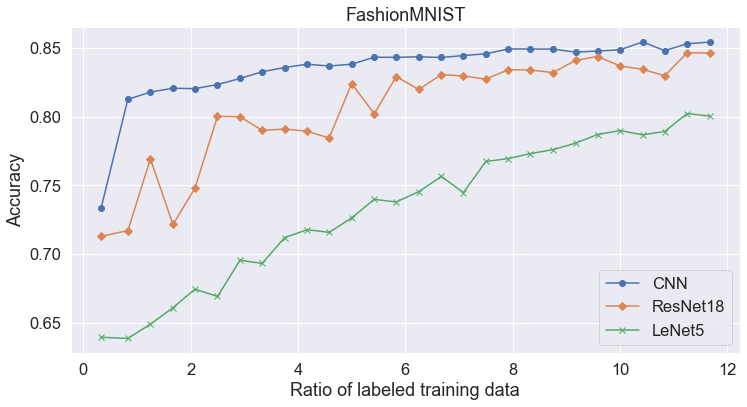

<Figure size 1080x2016 with 0 Axes>

In [45]:
plt.rcParams.update({'font.size': 25})
sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))

plt.plot(df_CNN['Ratios'][:28],df_CNN['Test ACC'][1:29],marker='o')
plt.plot(df_Res['Ratios'][:28],df_Res['Test ACC'][1:29],marker='D')
plt.plot(df_Le['Ratios'][:28],df_Le['Test ACC'][:28],marker='x')
#plt.plot(df_Random['Ratios'][:28],df_Random['Test ACC'][:28],marker='o')



plt.title("FashionMNIST")
plt.ylim=[0.55,1]
plt.ylabel("Accuracy")
plt.xlabel("Ratio of labeled training data")
plt.legend(['CNN', 'ResNet18','LeNet5'], loc='lower right')
plt.show()
plt.savefig('MNIST Accuracy.png')

# Time Analysis

In [31]:
CNN_time=np.round(sum(df_CNN['Time'][:16])/16)
Res_time=np.round(sum(df_Res['Time'][:16])/16)
Le_time=np.round(sum(df_Le['Time'][:16])/16)
#Random_time=round(sum(df_Random['Time'])/len(df_Random))
CNN_time,Res_time,Le_time

(640.0, 799.0, 126.0)

In [32]:
params=[61.7,305,11200]

In [33]:
Le_time=np.round(Le_time/CNN_time,3)
Res_time=np.round(Res_time/CNN_time,3)
CNN_time=1

In [37]:
times=np.array([Le_time,CNN_time,Res_time])#,VGG16_time,google_time,ResNet_time])#[2999000,4900000,4800000]
accr=[max(df_Le['Test ACC'][:28]),max(df_CNN['Test ACC'][:28]),max(df_Res['Test ACC'][:28])]
names=['LeNet5','CNN','ResNet18']#,'VGG16','GoogLeNet','ResNet']
arr=np.array([names,accr,times,params])
data=pd.DataFrame(arr.T,columns=['Models','accuracy','times','params(in 1000)'])
data

,Models,accuracy,times,params(in 1000)
0,LeNet5,0.8024,0.197,61.7
1,CNN,0.8545,1.0,305
2,ResNet18,0.8467,1.248,11200


In [38]:
sns.set_theme(color_codes=True)

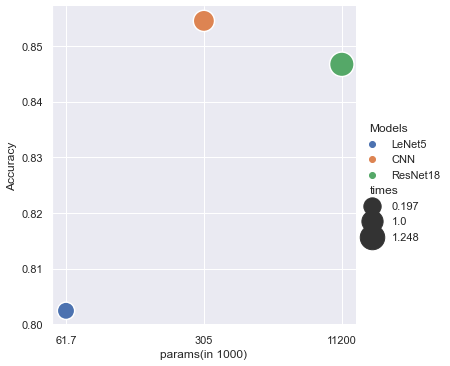

In [41]:
plt.rcParams.update({'font.size': 10})
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,28
sns.relplot(y=accr, x="params(in 1000)", size=data['times'], sizes=(600,300),hue="Models",data=data)

plt.ylabel("Accuracy")
plt.show()